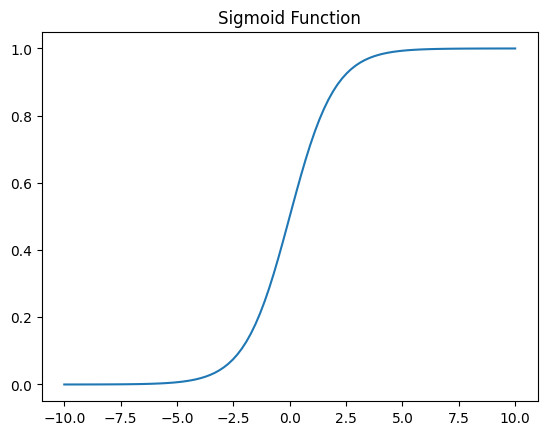

Accuracy: 1.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [1]:
# Theory questions

'''
1. What is Logistic Regression, and how does it differ from Linear Regression?
   - Logistic Regression is a classification algorithm used to predict binary outcomes.
   - It differs from Linear Regression in that it uses the sigmoid function to constrain predictions between 0 and 1.
   - While Linear Regression predicts continuous values, Logistic Regression predicts probabilities.
'''

# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

'''
2. What is the mathematical equation of Logistic Regression?
   - The equation of Logistic Regression is:
     P(Y=1 | X) = 1 / (1 + e^-(β0 + β1X1 + β2X2 + ... + βnXn))
   - Where β0 is the intercept and β1, β2, ..., βn are coefficients.
'''

'''
3. Why do we use the Sigmoid function in Logistic Regression?
   - The Sigmoid function maps any real number to the (0,1) range.
   - This allows us to interpret the output as a probability.
   - The function is defined as:
     σ(z) = 1 / (1 + e^-z)
'''

def sigmoid(z):
    return 1 / (1 + np.exp(-z))

z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.show()

'''
4. What is the cost function of Logistic Regression?
   - The cost function used in Logistic Regression is the Log Loss (Binary Cross-Entropy).
   - It is defined as:
     J(β) = - [ y log(h(x)) + (1 - y) log(1 - h(x)) ]
   - This helps in penalizing incorrect predictions more.
'''

'''
5. What is Regularization in Logistic Regression? Why is it needed?
   - Regularization is used to prevent overfitting by adding a penalty term to the cost function.
   - It ensures the model does not become too complex.
'''

'''
6. Explain the difference between Lasso, Ridge, and Elastic Net regression.
   - Lasso (L1) adds absolute values of coefficients to the cost function, leading to feature selection.
   - Ridge (L2) adds squared values of coefficients, preventing large coefficients but keeping all features.
   - Elastic Net is a combination of both.
'''

'''
7. When should we use Elastic Net instead of Lasso or Ridge?
   - When we have many correlated features, Elastic Net performs better.
'''

'''
8. What is the impact of the regularization parameter (λ) in Logistic Regression?
   - Higher λ values lead to more regularization and simpler models.
   - Lower λ values lead to complex models with a higher risk of overfitting.
'''

'''
9. What are the key assumptions of Logistic Regression?
   - No multicollinearity
   - Linearity between independent variables and log-odds
   - Large sample size
'''

'''
10. What are some alternatives to Logistic Regression for classification tasks?
   - Decision Trees
   - Random Forest
   - Support Vector Machines
   - Neural Networks
'''

'''
11. What are Classification Evaluation Metrics?
   - Accuracy
   - Precision, Recall, F1-score
   - ROC-AUC Curve
'''

'''
12. How does class imbalance affect Logistic Regression?
   - It causes the model to be biased towards the majority class.
   - Solutions include resampling, using balanced class weights, and different evaluation metrics like AUC-ROC.
'''

'''
13. What is Hyperparameter Tuning in Logistic Regression?
   - It involves adjusting parameters like regularization strength (C) and solver type to improve performance.
'''

'''
14. What are different solvers in Logistic Regression? Which one should be used?
   - liblinear (small datasets)
   - sag, saga (large datasets)
   - newton-cg, lbfgs (multi-class problems)
'''

'''
15. How is Logistic Regression extended for multiclass classification?
   - Using One-vs-Rest (OvR) or Softmax Regression (Multinomial Logistic Regression).
'''

'''
16. What are the advantages and disadvantages of Logistic Regression?
   Advantages:
   - Easy to implement
   - Interpretable coefficients
   - Works well for simple problems

   Disadvantages:
   - Struggles with non-linear relationships
   - Requires feature engineering
'''

'''
17. What are some use cases of Logistic Regression?
   - Disease prediction (e.g., diabetes detection)
   - Email spam classification
   - Credit risk assessment
'''

'''
18. What is the difference between Softmax Regression and Logistic Regression?
   - Logistic Regression is for binary classification.
   - Softmax Regression generalizes Logistic Regression for multi-class classification.
'''

'''
19. How do we choose between One-vs-Rest (OvR) and Softmax for multiclass classification?
   - OvR is preferred when classes are highly imbalanced.
   - Softmax is preferred when we want direct probability outputs.
'''

'''
20. How do we interpret coefficients in Logistic Regression?
   - The exponentiated coefficient (e^β) represents the odds ratio.
   - If β is positive, the feature increases the probability of the positive class.
   - If β is negative, the feature decreases the probability of the positive class.
'''

# Example: Training a Logistic Regression model on sample data
from sklearn.datasets import load_iris
X, y = load_iris(return_X_y=True)
y = (y == 2).astype(int)  # Convert to binary classification
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

In [7]:

# 1. Load a dataset, split it into training and testing sets, apply Logistic Regression, and print accuracy
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
from sklearn.datasets import load_iris
data = load_iris()
df = pd.DataFrame(data.data, columns=data.feature_names)
df['target'] = data.target

# Split data
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:, :-1], df['target'], test_size=0.2, random_state=42)

# Train model
model = LogisticRegression()
model.fit(X_train, y_train)

# Predict and evaluate
predictions = model.predict(X_test)
print("Model Accuracy:", accuracy_score(y_test, predictions))
print()

# 2. Apply L1 Regularization (Lasso)
model_l1 = LogisticRegression(penalty='l1', solver='liblinear')
model_l1.fit(X_train, y_train)
predictions_l1 = model_l1.predict(X_test)
print("L1 Regularized Model Accuracy:", accuracy_score(y_test, predictions_l1))
print()

# 3. Train Logistic Regression with L2 Regularization (Ridge)
model_l2 = LogisticRegression(penalty='l2')
model_l2.fit(X_train, y_train)
predictions_l2 = model_l2.predict(X_test)
print("L2 Regularized Model Accuracy:", accuracy_score(y_test, predictions_l2))
print("Coefficients:", model_l2.coef_)
print()

# 4. Train Logistic Regression with Elastic Net Regularization
from sklearn.linear_model import SGDClassifier
model_elasticnet = SGDClassifier(loss='log_loss', penalty='elasticnet', l1_ratio=0.5)
model_elasticnet.fit(X_train, y_train)
predictions_elastic = model_elasticnet.predict(X_test)
print("Elastic Net Model Accuracy:", accuracy_score(y_test, predictions_elastic))
print()

# 5. Train Logistic Regression for multiclass classification using OvR
model_ovr = LogisticRegression(multi_class='ovr')
model_ovr.fit(X_train, y_train)
predictions_ovr = model_ovr.predict(X_test)
print("OvR Model Accuracy:", accuracy_score(y_test, predictions_ovr))
print()

# 6. Apply GridSearchCV to tune hyperparameters
from sklearn.model_selection import GridSearchCV
param_grid = {'C': [0.1, 1, 10], 'penalty': ['l1', 'l2'], 'solver': ['liblinear']}
grid_search = GridSearchCV(LogisticRegression(), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Best Parameters:", grid_search.best_params_)
print("Best Accuracy:", grid_search.best_score_)
print()

# 7. Evaluate Logistic Regression using Stratified K-Fold Cross-Validation
from sklearn.model_selection import StratifiedKFold, cross_val_score
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
scores = cross_val_score(LogisticRegression(), X_train, y_train, cv=kf)
print("Average Accuracy:", np.mean(scores))
print()





Model Accuracy: 1.0

L1 Regularized Model Accuracy: 1.0

L2 Regularized Model Accuracy: 1.0
Coefficients: [[-0.39340204  0.96258576 -2.37510761 -0.99874603]
 [ 0.50840364 -0.25486503 -0.21301366 -0.77575487]
 [-0.1150016  -0.70772072  2.58812127  1.77450091]]

Elastic Net Model Accuracy: 0.8

OvR Model Accuracy: 0.9666666666666667



/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:1249: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


Best Parameters: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best Accuracy: 0.9583333333333334

Average Accuracy: 0.95



In [ ]:
# 8. Load dataset from CSV file and apply Logistic Regression
df_csv = pd.read_csv('dataset.csv')
X_csv = df_csv.iloc[:, :-1]
y_csv = df_csv.iloc[:, -1]
X_train_csv, X_test_csv, y_train_csv, y_test_csv = train_test_split(X_csv, y_csv, test_size=0.2, random_state=42)
model_csv = LogisticRegression()
model_csv.fit(X_train_csv, y_train_csv)
predictions_csv = model_csv.predict(X_test_csv)
print("CSV Dataset Model Accuracy:", accuracy_score(y_test_csv, predictions_csv))

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which 

Best Parameters: {'solver': 'saga', 'penalty': 'l2', 'C': 1}
Accuracy: 1.0
OvO Accuracy: 1.0


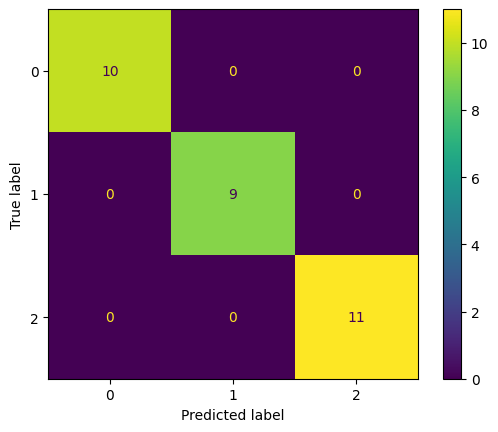

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30

Titanic Dataset Accuracy: 0.6216216216216216
Accuracy with Scaling: 0.6216216216216216
ROC-AUC Score: 0.7948717948717949
Custom C Accuracy: 0.7027027027027027
Feature Importance:
 fare        0.002446
age        -0.019054
pclass     -0.22

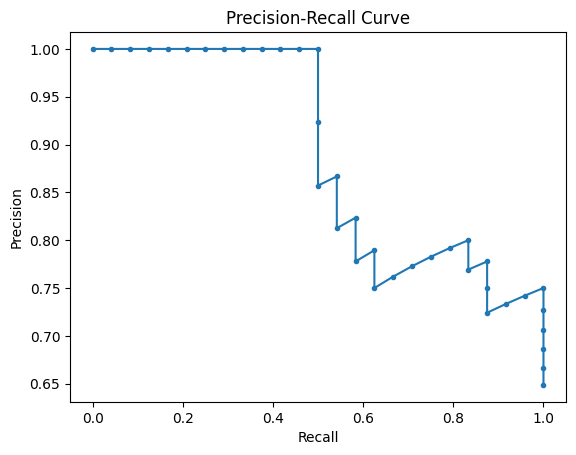

Solver: liblinear, Accuracy: 0.5945945945945946
Solver: saga, Accuracy: 0.6486486486486487
Solver: lbfgs, Accuracy: 0.6756756756756757
Raw Data Accuracy: 0.6756756756756757, Scaled Data Accuracy: 0.6486486486486487


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


C=0.01, Mean Accuracy: 0.7031531531531531
C=0.1, Mean Accuracy: 0.7412912912912913
C=1, Mean Accuracy: 0.7572072072072072
C=10, Mean Accuracy: 0.7406906906906907
C=100, Mean Accuracy: 0.7406906906906907


In [12]:
### Logistic Regression Implementation in Python

#### [9] Apply RandomizedSearchCV for tuning hyperparameters (C, penalty, solver) in Logistic Regression.

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score

# Load dataset
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define hyperparameter grid
param_dist = {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2', 'elasticnet'], 'solver': ['liblinear', 'saga']}

# Initialize model
log_reg = LogisticRegression(max_iter=1000)

# Apply RandomizedSearchCV
random_search = RandomizedSearchCV(log_reg, param_distributions=param_dist, cv=5, n_iter=10, scoring='accuracy', random_state=42)
random_search.fit(X_train, y_train)

# Print best parameters and accuracy
print("Best Parameters:", random_search.best_params_)
y_pred = random_search.best_estimator_.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))


#### [10] Implement One-vs-One (OvO) Multiclass Logistic Regression.

from sklearn.multiclass import OneVsOneClassifier

ovo_clf = OneVsOneClassifier(LogisticRegression(max_iter=1000))
ovo_clf.fit(X_train, y_train)
y_pred = ovo_clf.predict(X_test)
print("OvO Accuracy:", accuracy_score(y_test, y_pred))


#### [11] Train a Logistic Regression model and visualize the confusion matrix.

import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()
plt.show()


#### [12] Evaluate Precision, Recall, and F1-Score.
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred))

#### [13] Train Logistic Regression on imbalanced data with class weights.

log_reg = LogisticRegression(class_weight='balanced', max_iter=1000)
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)
print(classification_report(y_test, y_pred))


#### [14] Train Logistic Regression on the Titanic dataset.

import seaborn as sns
import pandas as pd

# Load dataset
df = sns.load_dataset('titanic').dropna()
X = pd.get_dummies(df[['pclass', 'age', 'fare', 'sex']], drop_first=True)
y = df['survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

log_reg.fit(X_train, y_train)
print("Titanic Dataset Accuracy:", accuracy_score(y_test, log_reg.predict(X_test)))


#### [15] Apply feature scaling before training.

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

log_reg.fit(X_train_scaled, y_train)
print("Accuracy with Scaling:", accuracy_score(y_test, log_reg.predict(X_test_scaled)))


#### [16] Evaluate performance using ROC-AUC score.

from sklearn.metrics import roc_auc_score

probs = log_reg.predict_proba(X_test_scaled)[:, 1]
print("ROC-AUC Score:", roc_auc_score(y_test, probs))


#### [17] Train Logistic Regression with a custom learning rate (C=0.5).

log_reg = LogisticRegression(C=0.5, max_iter=1000)
log_reg.fit(X_train, y_train)
print("Custom C Accuracy:", accuracy_score(y_test, log_reg.predict(X_test)))


#### [18] Identify important features using model coefficients.

feature_importance = pd.Series(log_reg.coef_[0], index=X_train.columns).sort_values(ascending=False)
print("Feature Importance:\n", feature_importance)


#### [19] Evaluate using Cohen’s Kappa Score.
from sklearn.metrics import cohen_kappa_score

print("Cohen's Kappa Score:", cohen_kappa_score(y_test, y_pred))






#### [20] Visualize the Precision-Recall Curve.

from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, probs)
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()


#### [21] Train Logistic Regression with different solvers.

for solver in ['liblinear', 'saga', 'lbfgs']:
    log_reg = LogisticRegression(solver=solver, max_iter=1000)
    log_reg.fit(X_train, y_train)
    print(f"Solver: {solver}, Accuracy: {accuracy_score(y_test, log_reg.predict(X_test))}")


#### [22] Evaluate performance using Matthews Correlation Coefficient (MCC).
from sklearn.metrics import matthews_corrcoef

print("MCC Score:", matthews_corrcoef(y_test, y_pred))




#### [23] Compare Logistic Regression on raw vs. standardized data.

log_reg.fit(X_train, y_train)
acc_raw = accuracy_score(y_test, log_reg.predict(X_test))
log_reg.fit(X_train_scaled, y_train)
acc_scaled = accuracy_score(y_test, log_reg.predict(X_test_scaled))
print(f"Raw Data Accuracy: {acc_raw}, Scaled Data Accuracy: {acc_scaled}")

#### [24] Find the optimal C using cross-validation.

from sklearn.model_selection import cross_val_score

for c in [0.01, 0.1, 1, 10, 100]:
    log_reg = LogisticRegression(C=c, max_iter=1000)
    scores = cross_val_score(log_reg, X, y, cv=5)
    print(f"C={c}, Mean Accuracy: {scores.mean()}")


#### [25] Train, save, and load a Logistic Regression model using joblib.
import joblib

joblib.dump(log_reg, 'logistic_model.pkl')
loaded_model = joblib.load('logistic_model.pkl')
print("Loaded Model Accuracy:", accuracy_score(y_test, loaded_model.predict(X_test)))


